# Inferential Statistics for Capstone 1
### Molly McNamara

The cleaned, wrangled dataset now consists of pollution data for cities across the United States from 2000 to early 2016 merged with weather data for a handful of the largest US cities from 2000-2015. Inferential statistics can now be used to explore the data further and identify potential relationships of interest for building a predictive model of pollutant levels.

### Import necessary packages and dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from IPython.display import display,HTML
pd.set_option("display.max.columns",500)
pd.set_option("display.max.rows",500)
%matplotlib inline
pollution = pd.read_csv('~/Desktop/weatherpollution.csv', index_col='Unnamed: 0')
pollution['Date_Local']= pd.to_datetime(pollution['Date_Local'],  errors='raise', format='%Y/%m/%d')
pollution.dtypes

Site_Num                    int64
Date_Local         datetime64[ns]
State                      object
County                     object
City                       object
NO2_Mean                  float64
NO2_1stMaxValue           float64
NO2_1stMaxHour            float64
NO2_AQI                   float64
O3_Mean                   float64
O3_1stMaxValue            float64
O3_1stMaxHour             float64
O3_AQI                    float64
SO2_Mean                  float64
SO2_1stMaxValue           float64
SO2_1stMaxHour            float64
SO2_AQI                   float64
CO_Mean                   float64
CO_1stMaxValue            float64
CO_1stMaxHour             float64
CO_AQI                    float64
Latitude                  float64
Longitude                 float64
Elevation                 float64
Precipitation             float64
TempMax                   float64
TempMin                   float64
dtype: object

### Subset this data to the top 10 US cities evaluated in Exploratory Data Analysis

In [9]:
top10cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
top10 = pollution[pollution['City'].isin(top10cities)]

In [10]:
# Let's revisit how many collection sites exist by city.
print("Number of Collection Sites Per", top10['Site_Num'].groupby(top10['City']).nunique())

Number of Collection Sites Per City
Chicago         1
Dallas          1
Houston         2
Los Angeles     3
New York        4
Philadelphia    1
Phoenix         2
San Antonio     1
San Diego       3
San Jose        1
Name: Site_Num, dtype: int64


In [11]:
# What is the earliest date of collection for each city?
print("Earliest Date by city", top10['Date_Local'].groupby(top10['City']).min())

Earliest Date by city City
Chicago        2000-01-06
Dallas         2000-01-01
Houston        2000-01-01
Los Angeles    2000-03-01
New York       2000-01-01
Philadelphia   2000-01-01
Phoenix        2000-01-01
San Antonio    2008-01-01
San Diego      2000-01-01
San Jose       2009-02-10
Name: Date_Local, dtype: datetime64[ns]


In [12]:
# What is the latest date of collection for each city?
print("Latest Date by city", top10['Date_Local'].groupby(top10['City']).max())

Latest Date by city City
Chicago        2000-10-31
Dallas         2016-03-31
Houston        2016-03-31
Los Angeles    2015-12-31
New York       2016-04-30
Philadelphia   2014-07-01
Phoenix        2016-03-26
San Antonio    2010-06-30
San Diego      2011-06-30
San Jose       2016-04-30
Name: Date_Local, dtype: datetime64[ns]


In [13]:
# Of the 10 largest cities in the US, only 7 of them have 14-15 years of data.  To be consistent for future analysis, we will use only these.
the7cities = ['New York', 'Los Angeles', 'Houston', 'Phoenix', 'Philadelphia', 'San Diego', 'Dallas']
pollution7 = pollution[pollution['City'].isin(the7cities)]

In [14]:
pollution7.shape

(56073, 27)

### Normality of the pollution data

Visually and statistically, each of the Air Quality Indices was evaluated for normality.

#### Nitrogen Dioxide

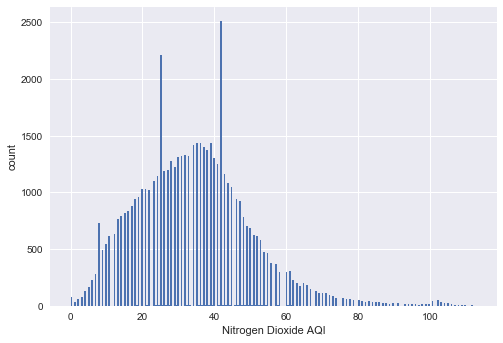

In [15]:
#Is the distribution of each pollutant normal?
sns.set()
n_data = len(pollution7.NO2_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.NO2_AQI, bins = n_bins)
plt.xlabel('Nitrogen Dioxide AQI')
plt.ylabel('count')
plt.show()

In [16]:
import scipy.stats as stats
stats.normaltest(pollution7.NO2_AQI)

NormaltestResult(statistic=6059.9321264519813, pvalue=0.0)

#### Ozone

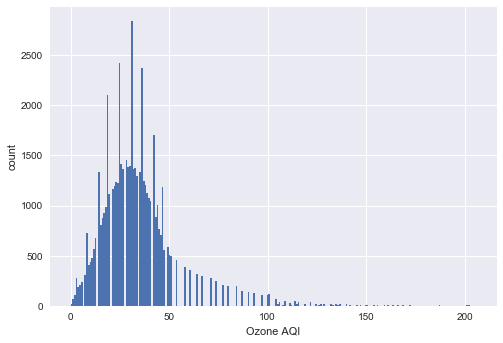

In [17]:
n_data = len(pollution7.O3_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.O3_AQI, bins = n_bins)
plt.xlabel('Ozone AQI')
plt.ylabel('count')
plt.show()

In [18]:
import scipy.stats as stats
stats.normaltest(pollution7.O3_AQI)

NormaltestResult(statistic=27675.215612500979, pvalue=0.0)

#### Sulfur Dioxide

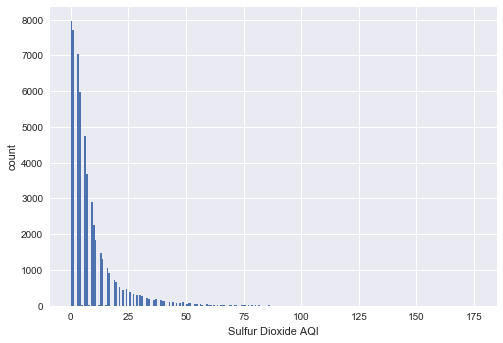

In [19]:
n_data = len(pollution7.SO2_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.SO2_AQI, bins = n_bins)
plt.xlabel('Sulfur Dioxide AQI')
plt.ylabel('count')
plt.show()

In [20]:
import scipy.stats as stats
stats.normaltest(pollution7.SO2_AQI)

NormaltestResult(statistic=40099.10134949725, pvalue=0.0)

#### Carbon Monoxide

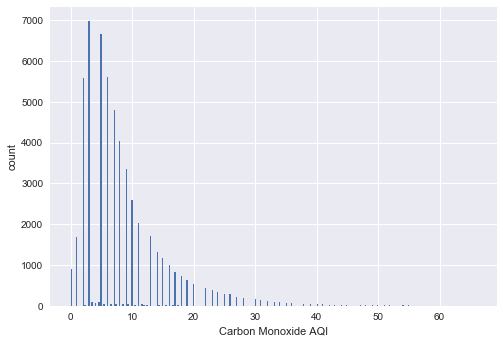

In [21]:
n_data = len(pollution7.CO_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(pollution7.CO_AQI, bins = n_bins)
plt.xlabel('Carbon Monoxide AQI')
plt.ylabel('count')
plt.show()

In [22]:
import scipy.stats as stats
stats.normaltest(pollution7.CO_AQI)

NormaltestResult(statistic=24896.081050749788, pvalue=0.0)

The pollutant data does not appear to be normally distributed. This is good to know and could be a result of a number of things: a number of extreme values, as can occur in nature at times, or many values close to 0 or some sort of natural limit.  

### Correlations of Interest

The pollutant indices and the raw mean daily values for each pollutant were assessed relative to the new weather data to see any potential correlations.

In [32]:
colsofinterest = ['NO2_AQI', 'NO2_Mean', 'O3_AQI', 'O3_Mean', 'SO2_AQI', 'SO2_Mean','CO_AQI', 'CO_Mean', 'Elevation', 'Precipitation', 'TempMax', 'TempMin']
pollution7[colsofinterest].corr()

,NO2_AQI,NO2_Mean,O3_AQI,O3_Mean,SO2_AQI,SO2_Mean,CO_AQI,CO_Mean,Elevation,Precipitation,TempMax,TempMin
NO2_AQI,1.000000,0.881274,0.045223,-0.255967,0.291974,0.285725,0.658486,0.626278,0.140556,-0.107773,-0.031722,-0.218325
NO2_Mean,0.881274,1.000000,-0.157326,-0.464975,0.363908,0.399538,0.705560,0.710177,0.052518,-0.085097,-0.180954,-0.337537
O3_AQI,0.045223,-0.157326,1.000000,0.803566,-0.139647,-0.194459,-0.150828,-0.160482,0.205611,-0.113583,0.519679,0.450026
O3_Mean,-0.255967,-0.464975,0.803566,1.000000,-0.237105,-0.276438,-0.353471,-0.343462,0.098733,-0.090900,0.432067,0.456356
SO2_AQI,0.291974,0.363908,-0.139647,-0.237105,1.000000,0.869305,0.212616,0.227979,-0.193016,-0.024529,-0.246591,-0.268050
SO2_Mean,0.285725,0.399538,-0.194459,-0.276438,0.869305,1.000000,0.246987,0.281580,-0.187934,-0.040518,-0.338154,-0.335841
CO_AQI,0.658486,0.705560,-0.150828,-0.353471,0.212616,0.246987,1.000000,0.945793,0.147338,-0.096545,-0.095540,-0.210896
CO_Mean,0.626278,0.710177,-0.160482,-0.343462,0.227979,0.281580,0.945793,1.000000,0.069613,-0.088833,-0.123343,-0.200408
Elevation,0.140556,0.052518,0.205611,0.098733,-0.193016,-0.187934,0.147338,0.069613,1.000000,-0.083237,0.326839,0.154783
Precipitation,-0.107773,-0.085097,-0.113583,-0.090900,-0.024529,-0.040518,-0.096545,-0.088833,-0.083237,1.000000,-0.075372,-0.003910


There do appear to be some interesting potential correlations between pollutant levels and the area temperatures, precipitation and even city elevation.

#### Look more closely at some of these correlations picking out some that look stronger to evaluate

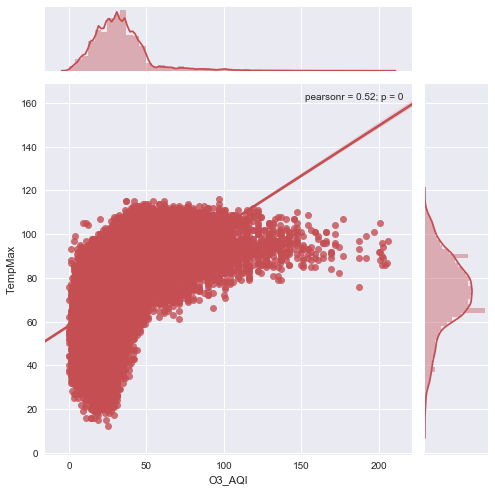

In [24]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_AQI', 'TempMax', data=pollution7, kind='reg', color='r', size=7)
plt.show()

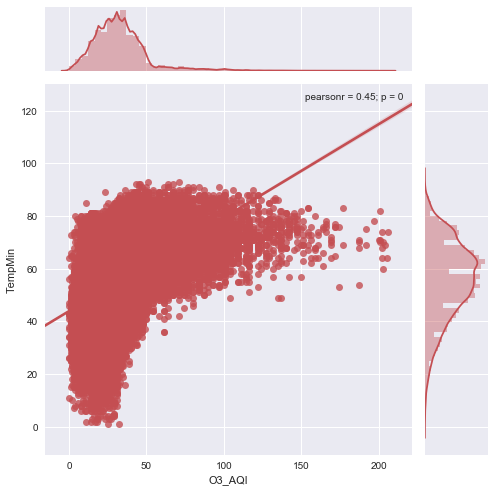

In [25]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

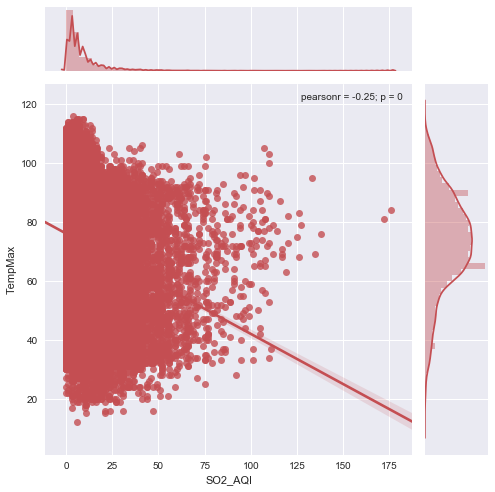

In [26]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('SO2_AQI', 'TempMax', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

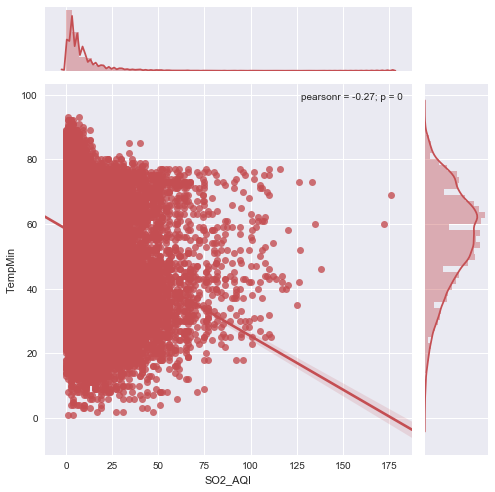

In [27]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('SO2_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

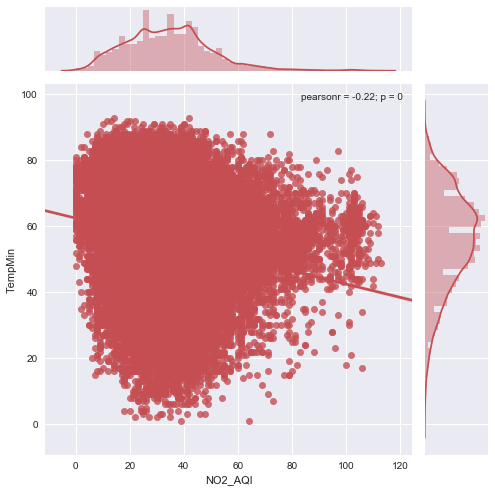

In [28]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('NO2_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

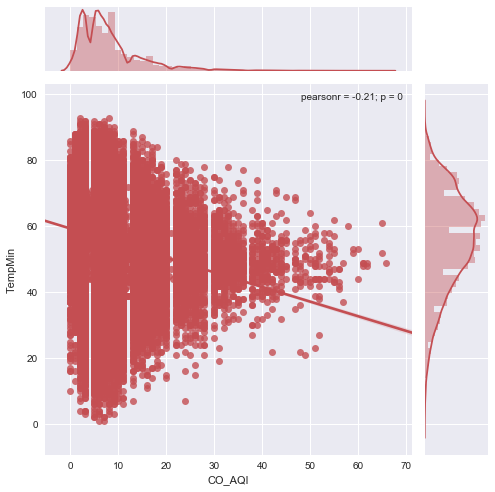

In [29]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('CO_AQI', 'TempMin', data=pollution7,
              kind='reg', color='r', size=7)
plt.show()

To further dissect some of these relationships, the correlation involving warmer temperatures and higher ozone levels was evaluated for Phoenix - one of the hotter cities in the US.  Conversely the correlation invovling cooler temperatures and higher nitrogen dioxide levels was evaluated for Philadelphia - one of the more northern cities in the subset.  The correlations prove to be even stronger for these cities.

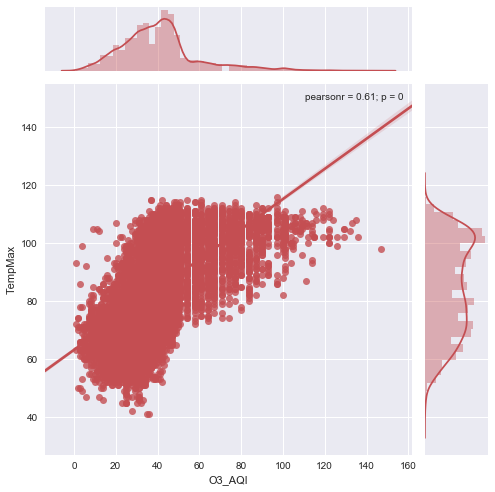

In [30]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('O3_AQI', 'TempMax', data=pollution7[pollution7['City'] == 'Phoenix'],
              kind='reg', color='r', size=7)
plt.show()

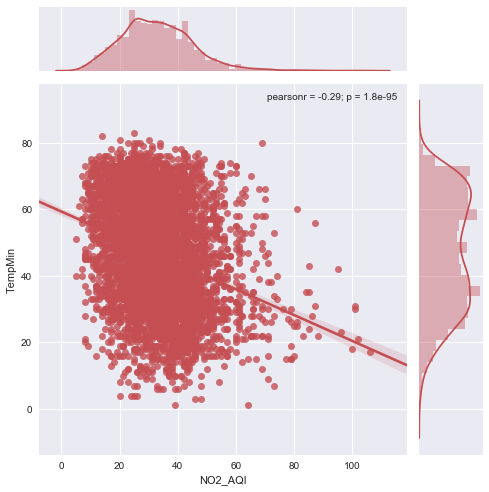

In [31]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('NO2_AQI', 'TempMin', data = pollution7[pollution7['City'] == 'Philadelphia'],
              kind='reg', color='r', size=7)
plt.show()

This assessment of the basic statistics surrounding the dataset gives some indication that the weather data can be linked to the pollution data, possibly even providing some predictions of changes in pollutant levels.  